Pyber Analysis by Zeshaun Subhani

These are some observable trends based on the data:

1. The large majority of ride sharing takes place in urban cities compared to suburban and rural ares. 68.4% of total rides occurred in the urban city type. This makes sense because in urban cities, parking spots are usually limited and it's more convenient to use ride sharing to get from one place to another without having to worry about parking.

2. Urban cities also have the largest percentage of drivers compared to rural and suburban cities. The driver count should correlate to where the largest amount of ride sharing takes place so that supply (amount of drivers) meets demand (amount of rides being requested/taken).

3. The highest average fares generally are in the rural cities compared to suburban and urban cities. This is likely due to fewer amount of drivers being available in rural cities so the ride sharing company can charge more for fares in those areas.

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(ride_df, city_df, how='left', on='city')


# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
#Merged dataframe
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [3]:
# filter by Rural type, group by city names and then calculate average fare
rural_city_average_fare = combined_df[combined_df["type"] == "Rural"].groupby("city")["fare"].mean()
rural_city_average_fare

city
Bradshawfurt         40.064000
Garzaport            24.123333
Harringtonfort       33.470000
Jessicaport          36.013333
Lake Jamie           34.358333
Lake Latoyabury      26.061818
Michaelberg          34.997500
New Ryantown         43.278333
Newtonview           36.745000
North Holly          29.130000
North Jaime          30.802500
Penaborough          35.246000
Randallchester       29.742000
South Jennifer       35.264286
South Marychester    41.870000
South Saramouth      36.160000
Taylorhaven          42.263333
West Heather         33.890000
Name: fare, dtype: float64

In [4]:
# put all of the rural average fare values into a list to use later in plot
rural_fares = rural_city_average_fare.tolist()
rural_fares

[40.064,
 24.123333333333335,
 33.47,
 36.01333333333333,
 34.358333333333334,
 26.061818181818182,
 34.99750000000001,
 43.278333333333336,
 36.745000000000005,
 29.130000000000003,
 30.802500000000002,
 35.246,
 29.741999999999997,
 35.26428571428572,
 41.870000000000005,
 36.16,
 42.26333333333333,
 33.89]

In [5]:
# filter by Suburban type, group by city names and then calculate average fare
suburban_city_average_fare = combined_df[combined_df["type"] == "Suburban"].groupby("city")["fare"].mean()
suburban_city_average_fare

city
Barronchester         36.422500
Bethanyland           32.956111
Brandonfort           35.437368
Colemanland           30.894545
Davidfurt             31.995882
East Aaronbury        25.661111
East Danielview       31.560588
East Kentstad         29.823077
East Marymouth        30.835185
Grayville             27.763333
Josephside            32.858148
Lake Ann              30.890000
Lake Omar             28.075000
Lake Robertside       31.262000
Lake Scott            31.886111
Lewishaven            25.241667
Lewisland             34.614118
Mezachester           30.760000
Myersshire            30.203125
New Olivia            34.054118
New Raymond           27.961818
New Shannonberg       28.378235
Nicolechester         30.909474
North Jeffrey         29.242308
North Richardhaven    24.704286
North Timothy         31.262000
Port Shane            31.077895
Rodriguezview         30.745333
Sotoville             31.980000
South Brenda          33.964583
South Teresa          31.220455
Ver

In [6]:
# put all of the suburban average fare values into a list to use later in plot
suburban_fares = suburban_city_average_fare.tolist()
suburban_fares

[36.42249999999999,
 32.95611111111112,
 35.43736842105263,
 30.89454545454545,
 31.99588235294118,
 25.66111111111111,
 31.560588235294116,
 29.82307692307692,
 30.835185185185182,
 27.76333333333333,
 32.85814814814815,
 30.89,
 28.074999999999996,
 31.261999999999997,
 31.886111111111113,
 25.241666666666664,
 34.61411764705882,
 30.759999999999998,
 30.203125,
 34.054117647058824,
 27.96181818181818,
 28.37823529411765,
 30.909473684210518,
 29.242307692307698,
 24.70428571428571,
 31.262000000000004,
 31.077894736842108,
 30.745333333333335,
 31.979999999999997,
 33.96458333333334,
 31.22045454545454,
 32.82823529411765,
 27.780000000000005,
 29.547619047619055,
 29.871500000000005,
 31.874999999999996]

In [7]:
# filter by Urban type, group by city names and then calculate average fare
urban_city_average_fare = combined_df[combined_df["type"] == "Urban"].groupby("city")["fare"].mean()
urban_city_average_fare

city
Amandaburgh             24.641667
Barajasview             25.332273
Carriemouth             28.314444
Christopherfurt         24.501852
Deanville               25.842632
East Kaylahaven         23.757931
Erikaland               24.906667
Grahamburgh             25.221200
Huntermouth             28.993750
Hurleymouth             25.891429
Jerryton                25.649200
Johnton                 26.785714
Joneschester            22.289600
Justinberg              23.694333
Karenberg               26.340000
Karenside               27.453571
Lake Danielberg         24.844231
Lake Jonathanshire      23.425833
Lake Scottton           23.809167
Leahton                 21.243810
Liumouth                26.150000
Loganberg               25.292500
Martinezhaven           22.651250
New Jacobville          26.765556
New Kimberlyborough     22.589000
New Paulton             27.820000
New Paulville           21.675909
North Barbara           23.494091
North Jasmine           25.205333
North Jas

In [8]:
# put all of the urban average fare values into a list to use later in plot
urban_fares = urban_city_average_fare.tolist()
urban_fares

[24.641666666666666,
 25.332272727272724,
 28.314444444444437,
 24.50185185185185,
 25.842631578947366,
 23.75793103448276,
 24.906666666666666,
 25.2212,
 28.993749999999995,
 25.89142857142857,
 25.649200000000004,
 26.78571428571428,
 22.2896,
 23.694333333333322,
 26.340000000000003,
 27.453571428571433,
 24.84423076923077,
 23.425833333333333,
 23.809166666666666,
 21.243809523809524,
 26.149999999999995,
 25.2925,
 22.65125,
 26.765555555555558,
 22.589000000000002,
 27.820000000000004,
 21.67590909090909,
 23.49409090909091,
 25.20533333333333,
 22.743714285714287,
 22.623599999999996,
 27.504285714285718,
 23.98047619047619,
 23.836842105263155,
 25.854999999999997,
 27.201515151515153,
 23.006363636363638,
 25.64280000000001,
 21.4804,
 21.919473684210526,
 22.373214285714287,
 23.72916666666666,
 23.0605,
 28.616956521739127,
 22.097727272727273,
 20.570666666666668,
 23.355833333333337,
 26.72612903225806,
 22.965263157894736,
 26.535526315789475,
 20.093157894736848,
 24.45

In [9]:
# filter by Rural type, group by city names and then calculate total number of rides
rural_city_ride_count = combined_df[combined_df["type"] == "Rural"].groupby("city")["ride_id"].count()
rural_city_ride_count

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [10]:
# put all of the rural ride count values into a list to use later in plot
rural_city_rides = rural_city_ride_count.tolist()
rural_city_rides

[10, 3, 6, 6, 6, 11, 12, 6, 4, 9, 8, 5, 5, 7, 8, 4, 6, 9]

In [11]:
# filter by Suburban type, group by city names and then calculate total number of rides
suburban_city_ride_count = combined_df[combined_df["type"] == "Suburban"].groupby("city")["ride_id"].count()
suburban_city_ride_count

city
Barronchester         16
Bethanyland           18
Brandonfort           19
Colemanland           22
Davidfurt             17
East Aaronbury         9
East Danielview       17
East Kentstad         13
East Marymouth        27
Grayville             15
Josephside            27
Lake Ann              12
Lake Omar             14
Lake Robertside       25
Lake Scott            18
Lewishaven            12
Lewisland             17
Mezachester           17
Myersshire            16
New Olivia            17
New Raymond           22
New Shannonberg       17
Nicolechester         19
North Jeffrey         13
North Richardhaven    14
North Timothy         15
Port Shane            19
Rodriguezview         15
Sotoville             11
South Brenda          24
South Teresa          22
Veronicaberg          17
Victoriaport          14
West Hannah           21
West Kimmouth         20
Williamsonville       14
Name: ride_id, dtype: int64

In [12]:
# put all of the suburban ride count values into a list to use later in plot
suburban_city_rides = suburban_city_ride_count.tolist()
suburban_city_rides

[16,
 18,
 19,
 22,
 17,
 9,
 17,
 13,
 27,
 15,
 27,
 12,
 14,
 25,
 18,
 12,
 17,
 17,
 16,
 17,
 22,
 17,
 19,
 13,
 14,
 15,
 19,
 15,
 11,
 24,
 22,
 17,
 14,
 21,
 20,
 14]

In [13]:
# filter by urban type, group by city names and then calculate total number of rides
urban_city_ride_count = combined_df[combined_df["type"] == "Urban"].groupby("city")["ride_id"].count()
urban_city_ride_count

city
Amandaburgh             18
Barajasview             22
Carriemouth             27
Christopherfurt         27
Deanville               19
East Kaylahaven         29
Erikaland               12
Grahamburgh             25
Huntermouth             24
Hurleymouth             28
Jerryton                25
Johnton                 21
Joneschester            25
Justinberg              30
Karenberg               17
Karenside               28
Lake Danielberg         26
Lake Jonathanshire      24
Lake Scottton           24
Leahton                 21
Liumouth                33
Loganberg               28
Martinezhaven           24
New Jacobville          18
New Kimberlyborough     30
New Paulton             19
New Paulville           22
North Barbara           22
North Jasmine           30
North Jason             35
                        ..
Port Johnbury           22
Port Samanthamouth      25
Raymondhaven            25
Reynoldsfurt            19
Richardfort             28
Roberthaven            

In [14]:
# put all of the urban ride count values into a list to use later in plot
urban_city_rides = urban_city_ride_count.tolist()
urban_city_rides

[18,
 22,
 27,
 27,
 19,
 29,
 12,
 25,
 24,
 28,
 25,
 21,
 25,
 30,
 17,
 28,
 26,
 24,
 24,
 21,
 33,
 28,
 24,
 18,
 30,
 19,
 22,
 22,
 30,
 35,
 25,
 14,
 21,
 19,
 22,
 33,
 22,
 25,
 25,
 19,
 28,
 24,
 20,
 23,
 22,
 30,
 24,
 31,
 19,
 38,
 19,
 31,
 31,
 22,
 39,
 30,
 26,
 18,
 23,
 28,
 26,
 16,
 31,
 25,
 23,
 20]

In [15]:
# circle size correlates with driver count per city so get rural driver count per city
rural_driver_count_city = combined_df[combined_df["type"] == "Rural"].groupby("city")["driver_count"].unique()
rural_driver_count_city

city
Bradshawfurt         [7]
Garzaport            [7]
Harringtonfort       [4]
Jessicaport          [1]
Lake Jamie           [4]
Lake Latoyabury      [2]
Michaelberg          [6]
New Ryantown         [2]
Newtonview           [1]
North Holly          [8]
North Jaime          [1]
Penaborough          [6]
Randallchester       [9]
South Jennifer       [7]
South Marychester    [1]
South Saramouth      [7]
Taylorhaven          [1]
West Heather         [4]
Name: driver_count, dtype: object

In [16]:
# create a new list for rural driver count by city
new_rural_driver_count = []
for item in rural_driver_count_city:
    new_rural_driver_count.append(item[0])
new_rural_driver_count

[7, 7, 4, 1, 4, 2, 6, 2, 1, 8, 1, 6, 9, 7, 1, 7, 1, 4]

In [17]:
# circle size correlates with driver count per city so get suburban driver count per city
suburban_driver_count_city = combined_df[combined_df["type"] == "Suburban"].groupby("city")["driver_count"].unique()
suburban_driver_count_city

city
Barronchester         [11]
Bethanyland           [22]
Brandonfort           [10]
Colemanland           [23]
Davidfurt             [23]
East Aaronbury         [7]
East Danielview       [22]
East Kentstad         [20]
East Marymouth         [5]
Grayville              [2]
Josephside            [25]
Lake Ann               [3]
Lake Omar             [22]
Lake Robertside        [4]
Lake Scott            [23]
Lewishaven            [23]
Lewisland              [4]
Mezachester           [14]
Myersshire            [19]
New Olivia            [20]
New Raymond           [17]
New Shannonberg       [20]
Nicolechester         [19]
North Jeffrey         [11]
North Richardhaven     [1]
North Timothy          [7]
Port Shane             [7]
Rodriguezview         [20]
Sotoville             [10]
South Brenda           [1]
South Teresa          [21]
Veronicaberg          [20]
Victoriaport          [16]
West Hannah           [12]
West Kimmouth          [4]
Williamsonville        [2]
Name: driver_count, dty

In [18]:
# create a new list for suburban driver count by city
new_suburban_driver_count = []
for item in suburban_driver_count_city:
    new_suburban_driver_count.append(item[0])
new_suburban_driver_count

[11,
 22,
 10,
 23,
 23,
 7,
 22,
 20,
 5,
 2,
 25,
 3,
 22,
 4,
 23,
 23,
 4,
 14,
 19,
 20,
 17,
 20,
 19,
 11,
 1,
 7,
 7,
 20,
 10,
 1,
 21,
 20,
 16,
 12,
 4,
 2]

In [19]:
# circle size correlates with driver count per city so get urban driver count per city
urban_driver_count_city = combined_df[combined_df["type"] == "Urban"].groupby("city")["driver_count"].unique()
urban_driver_count_city

city
Amandaburgh             [12]
Barajasview             [26]
Carriemouth             [52]
Christopherfurt         [41]
Deanville               [49]
East Kaylahaven         [65]
Erikaland               [37]
Grahamburgh             [61]
Huntermouth             [37]
Hurleymouth             [36]
Jerryton                [64]
Johnton                 [27]
Joneschester            [39]
Justinberg              [39]
Karenberg               [22]
Karenside                [5]
Lake Danielberg         [19]
Lake Jonathanshire       [5]
Lake Scottton           [58]
Leahton                 [17]
Liumouth                [69]
Loganberg               [23]
Martinezhaven           [25]
New Jacobville          [50]
New Kimberlyborough     [33]
New Paulton             [44]
New Paulville           [44]
North Barbara           [18]
North Jasmine           [33]
North Jason              [6]
                        ... 
Port Johnbury            [3]
Port Samanthamouth      [57]
Raymondhaven            [11]
Reynoldsf

In [20]:
# create a new list for urban driver count by city
new_urban_driver_count = []
for item in urban_driver_count_city:
    new_urban_driver_count.append(item[0])
new_urban_driver_count

[12,
 26,
 52,
 41,
 49,
 65,
 37,
 61,
 37,
 36,
 64,
 27,
 39,
 39,
 22,
 5,
 19,
 5,
 58,
 17,
 69,
 23,
 25,
 50,
 33,
 44,
 44,
 18,
 33,
 6,
 19,
 22,
 59,
 67,
 7,
 23,
 3,
 57,
 11,
 67,
 38,
 47,
 12,
 34,
 25,
 64,
 21,
 11,
 46,
 4,
 10,
 72,
 38,
 45,
 48,
 70,
 32,
 25,
 57,
 28,
 45,
 25,
 39,
 73,
 59,
 46]

In [21]:
# try to make size of circles bigger by multiplying the values of each driver_count list by 10

scale_new_rural_driver_count = [i * 10 for i in new_rural_driver_count]
scale_new_suburban_driver_count = [i * 10 for i in new_suburban_driver_count]
scale_new_urban_driver_count = [i * 10 for i in new_urban_driver_count]

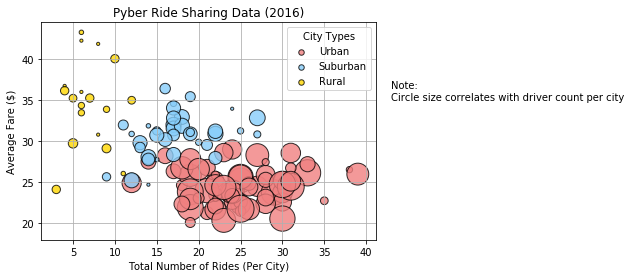

In [23]:
# Build the scatter plots for each city types

# so now x-axis for the three different scatter plots should be rural_city_rides, suburban_city_rides, and urban_city_rides
# y-axis for the three differnent scatter plots should be rural_fares, suburban_fares, and urban_fares
# s (size) for the three different scatter plots should be scale_new_rural_driver_count, scale_new_suburban_driver_count, and scale_new_urban_driver_count

#label for x-axis
plt.xlabel("Total Number of Rides (Per City)")
#label for y-axis
plt.ylabel("Average Fare ($)")

#create handles for legend and add marker, color, label, edgecolors, alpha and linewidths
rural =plt.scatter(rural_city_rides, rural_fares, s=scale_new_rural_driver_count, marker="o",color="gold", label="Rural", edgecolors="black", alpha=0.8, linewidths=1)
urban =plt.scatter(urban_city_rides, urban_fares, s=scale_new_urban_driver_count, marker="o",color="lightcoral", label="Urban", edgecolors="black", alpha=0.8, linewidths=1)
suburban =plt.scatter(suburban_city_rides, suburban_fares, s=scale_new_suburban_driver_count, marker="o",color="lightskyblue", label="Suburban", edgecolors="black", alpha=0.8, linewidths=1)
# add title to legend and location
lgnd = plt.legend(handles = [urban, suburban, rural], loc="upper right", title="City Types")
#change the circle size in legend for all three city types to be same size
lgnd.legendHandles[0]._sizes = [30.0]
lgnd.legendHandles[1]._sizes = [30.0]
lgnd.legendHandles[2]._sizes = [30.0]

# make title
plt.title("Pyber Ride Sharing Data (2016)")

# Set a grid on the plot
plt.grid()

# Incorporate a text label regarding circle size
textstr = 'Note:\nCircle size correlates with driver count per city'
# x-axis location is about 43 and y-axis location is about 35 to put the text label
plt.text(43,35, textstr)

# Save Figure
plt.savefig("Images/Pyber_Ride_Sharing_Bubble_Plot.png")

plt.show()

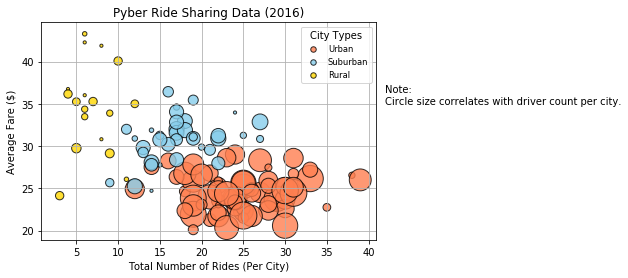

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

In [24]:
# Calculate Type Percents

In [31]:
# group by city type and then add up the total amount of fares by type (rural, suburban, and urban)
city_type_fares_group = combined_df.groupby("type")
city_type_fares_total = city_type_fares_group['fare'].sum()
city_type_fares_total

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [32]:
# calculate fare total for rural and assign to float value
rural_fares = city_type_fares_total.iloc[0:1]
print(rural_fares)
print("****")
rural_fares_value = rural_fares.sum()
print(rural_fares_value)
type(rural_fares_value)

type
Rural    4327.93
Name: fare, dtype: float64
****
4327.930000000002


numpy.float64

In [33]:
# calculate fare total for suburban and assign to float value
suburban_fares = city_type_fares_total.iloc[1:2]
print(suburban_fares)
print("****")
suburban_fares_value = suburban_fares.sum()
print(suburban_fares_value)
type(suburban_fares_value)

type
Suburban    19356.33
Name: fare, dtype: float64
****
19356.330000000013


numpy.float64

In [34]:
# calculate fare total for urban and assign to float value
urban_fares = city_type_fares_total.iloc[2:3]
print(urban_fares)
print("****")
urban_fares_value = urban_fares.sum()
print(urban_fares_value)
type(urban_fares_value)

type
Urban    39854.38
Name: fare, dtype: float64
****
39854.380000000085


numpy.float64

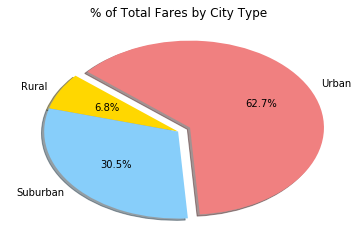

In [35]:
# Build Pie Chart
fares_city_types = ["Rural", "Suburban", "Urban"]
fares_city_types_values = [rural_fares_value,suburban_fares_value,urban_fares_value]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0,0,0.1)

# Title
plt.title('% of Total Fares by City Type')

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(fares_city_types_values, explode=explode, labels=fares_city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("Images/Pyber_Fares_City_Type.png")

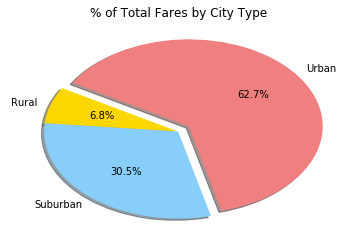

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [48]:
# Calculate Ride Percents


In [49]:
# Apply count function to ride_id column to get total number of rides by city 
city_type_total_rides = city_type_fares_group['ride_id'].count()
print(city_type_total_rides)
print(type(city_type_total_rides))

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64
<class 'pandas.core.series.Series'>


In [50]:
# calculate number of rural rides and assign to int value
rural_rides = city_type_total_rides.iloc[0:1]
print(rural_rides)
print("****")
rural_rides_value = rural_rides.sum()
print(rural_rides_value)
type(rural_rides_value)

type
Rural    125
Name: ride_id, dtype: int64
****
125


numpy.int64

In [51]:
# calculate number of suburban rides and assign to int value
suburban_rides = city_type_total_rides.iloc[1:2]
print(suburban_rides)
print("****")
suburban_rides_value = suburban_rides.sum()
print(suburban_rides_value)
type(suburban_rides_value)

type
Suburban    625
Name: ride_id, dtype: int64
****
625


numpy.int64

In [52]:
# calculate number of urban rides and assign to int value
urban_rides = city_type_total_rides.iloc[2:3]
print(urban_rides)
print("****")
urban_rides_value = urban_rides.sum()
print(urban_rides_value)
type(urban_rides_value)

type
Urban    1625
Name: ride_id, dtype: int64
****
1625


numpy.int64

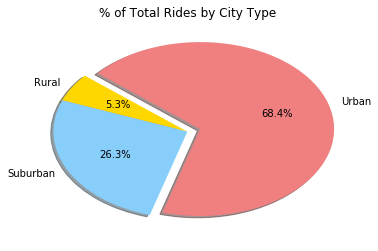

In [53]:
# Build Pie Chart
rides_city_types = ["Rural", "Suburban", "Urban"]
rides_city_types_values = [rural_rides_value,suburban_rides_value,urban_rides_value]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0,0,0.1)

# Title
plt.title('% of Total Rides by City Type')

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(rides_city_types_values, explode=explode, labels=rides_city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("Images/Pyber_Rides_City_Type.png")

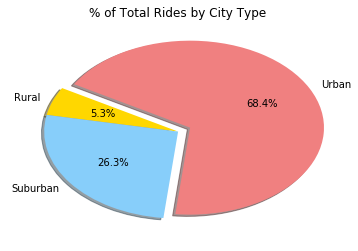

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [54]:
# Calculate Driver Percents

In [55]:
# Apply count function to driver_count column to get total number of drivers 
city_type_total_drivers_df = city_df['driver_count'].sum()
city_type_total_drivers_df

2973

In [56]:
# group by type and then take sum to get total number of drivers by type
city_type_drivers_group = city_df.groupby("type")
city_type_drivers_total = city_type_drivers_group['driver_count'].sum()
city_type_drivers_total

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [57]:
# calculate number of rural drivers and assign to int value
rural_drivers = city_type_drivers_total.iloc[0:1]
print(rural_drivers)
print("****")
rural_driver_value = rural_drivers.sum()
print(rural_driver_value)
type(rural_driver_value)

type
Rural    78
Name: driver_count, dtype: int64
****
78


numpy.int64

In [58]:
# calculate number of suburban drivers and assign to int value
suburban_drivers = city_type_drivers_total.iloc[1:2]
print(suburban_drivers)
print("****")
suburban_driver_value = suburban_drivers.sum()
print(suburban_driver_value)
type(suburban_driver_value)

type
Suburban    490
Name: driver_count, dtype: int64
****
490


numpy.int64

In [59]:
# calculate number of urban drivers and assign to int value
urban_drivers = city_type_drivers_total.iloc[2:3]
print(urban_drivers)
print("****")
urban_driver_value = urban_drivers.sum()
print(urban_driver_value)
type(urban_driver_value)

type
Urban    2405
Name: driver_count, dtype: int64
****
2405


numpy.int64

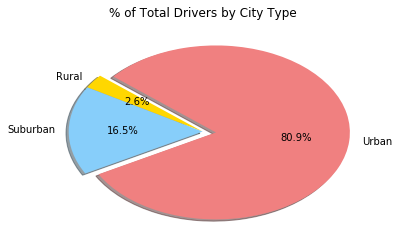

In [60]:
# Build Pie Chart
drivers_city_types = ["Rural", "Suburban", "Urban"]
drivers_city_types_values = [rural_driver_value,suburban_driver_value,urban_driver_value]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0,0,0.1)

# Title
plt.title('% of Total Drivers by City Type')

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(drivers_city_types_values, explode=explode, labels=drivers_city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("Images/Pyber_Drivers_City_Type.png")

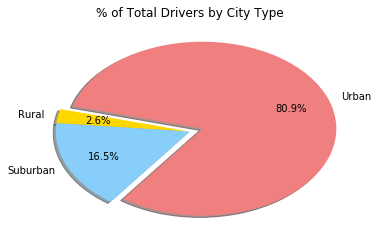

In [6]:
# Show Figure
plt.show()